In [1]:
import pandas as pd
import itertools
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Your sensor positions and data for 30 sensors
sensor_positions = np.array([[np.random.randint(1, 100), np.random.randint(1, 100)] for _ in range(15)])

# Sensor data for each sensor at 20 different time steps
sensor_data = np.array([[np.random.randint(10, 100) for _ in range(20)] for _ in range(15)])

In [3]:
sensor_positions = np.array([[10, 10], [20, 30], [30, 20], [40, 40], [50, 10]])
sensor_data = np.array([[10, 15, 20, 28, 30, 29, 33, 36, 40, 45], [20, 26, 28, 35, 36, 33, 40, 44, 47, 50], [30, 35, 38, 40, 41, 44, 45, 46, 48, 50], [40, 44, 48, 50, 52, 54, 56, 58, 60, 62], [50, 55, 58, 60, 65, 67, 70, 72, 75, 78]])


In [4]:
num_sensors = len(sensor_positions)
num_sensors_to_pick = 3

In [5]:


# All sensor positions and their corresponding data
# sensor_positions = np.array([[10, 10], [20, 30], [30, 20], [40, 40], [50, 10]])
# sensor_data = np.array([[10, 15, 20, 28, 30, 29, 33, 36, 40, 45], [20, 26, 28, 35, 36, 33, 40, 44, 47, 50], [30, 35, 38, 40, 41, 44, 45, 46, 48, 50], [40, 44, 48, 50, 52, 54, 56, 58, 60, 62], [50, 55, 58, 60, 65, 67, 70, 72, 75, 78]])
gp = GaussianProcessRegressor()

# Train GP model on all sensor data
gp.fit(sensor_positions, sensor_data)
all_sensor_pred = gp.predict(sensor_positions)

min_mse = float('inf')
best_subset = None
results = []

# Check all combinations
for combo in itertools.combinations(range(num_sensors), num_sensors_to_pick): 
    combo = list(combo) 
    gp.fit(sensor_positions[combo], sensor_data[combo]) 
    combo_pred = gp.predict(sensor_positions) 
    mse = mean_squared_error(all_sensor_pred, combo_pred) 
    results.append({'subset': combo, 'mse': mse})
    if mse < min_mse: 
        min_mse = mse 
        best_subset = combo

# Save results in a DataFrame
df = pd.DataFrame(results)

# Print the best subset and its corresponding MSE
print(f'The best sensor subset is {best_subset} with MSE = {min_mse}')

# Print the DataFrame with all results
print(df.sort_values('mse'))

The best sensor subset is [2, 3, 4] with MSE = 459.49999990809994
      subset      mse
9  [2, 3, 4]   459.50
8  [1, 3, 4]   539.82
5  [0, 3, 4]   628.92
7  [1, 2, 4]   743.28
4  [0, 2, 4]   832.38
2  [0, 1, 4]   912.70
6  [1, 2, 3]  1045.12
3  [0, 2, 3]  1134.22
1  [0, 1, 3]  1214.54
0  [0, 1, 2]  1418.00


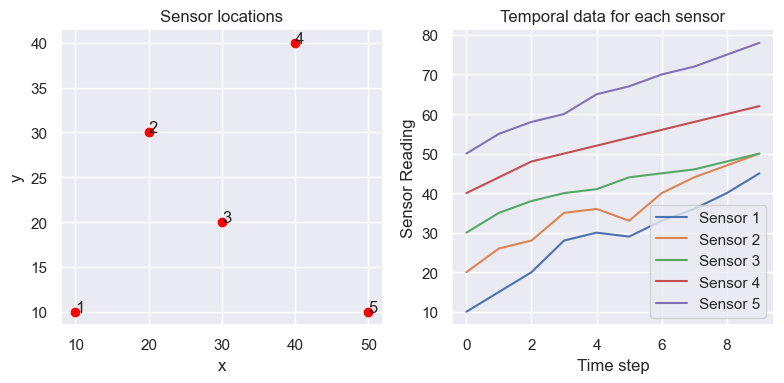

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Create a single figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Visualizing the sensor locations
ax1.scatter(sensor_positions[:, 0], sensor_positions[:, 1], c='red')
ax1.set_title('Sensor locations')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
for i, txt in enumerate(range(1, 6)):
    ax1.annotate(txt, (sensor_positions[i, 0], sensor_positions[i, 1]))
ax1.grid(True)

# Temporal Data Visualization
sensor_data_T = sensor_data.T  # Transpose for plotting
time_steps = range(10)
for i in range(5):
    ax2.plot(time_steps, sensor_data_T[:, i], label=f'Sensor {i + 1}')
ax2.set_title('Temporal data for each sensor')
ax2.set_xlabel('Time step')
ax2.set_ylabel('Sensor Reading')
ax2.legend()
ax2.grid(True)

# Show the combined figure
plt.tight_layout()
plt.show()

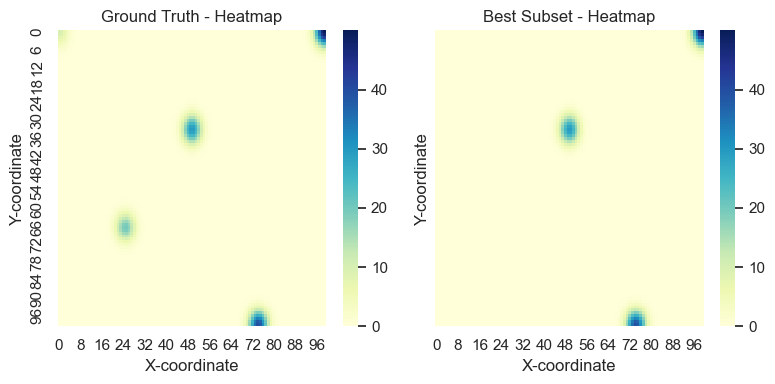

In [7]:
# Create grid
grid_size = 100
x = np.linspace(sensor_positions[:, 0].min(), sensor_positions[:, 0].max(), grid_size)
y = np.linspace(sensor_positions[:, 1].min(), sensor_positions[:, 1].max(), grid_size)
xx, yy = np.meshgrid(x, y)
grid_positions = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])

# Calculate ground truth, all sensor predictions, and best subset predictions
gp.fit(sensor_positions, sensor_data)
ground_truth_grid = gp.predict(grid_positions)

gp.fit(sensor_positions[best_subset], sensor_data[best_subset])
best_subset_pred_grid = gp.predict(grid_positions)

# All possible sensor subsets (excluding empty subset)
all_subsets = list(itertools.chain(*[itertools.combinations(range(5), n) for n in range(1, 6)]))

# Compare only the 16 possible subsets and the best solution
combinations_to_compare = all_subsets

# Time step for the heatmaps
time_step_index = 0

# Ground Truth, All Sensors, Best Subset heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ground_truth_2d = ground_truth_grid[:, time_step_index].reshape(grid_size, grid_size)
sns.heatmap(ground_truth_2d, cmap="YlGnBu", ax=ax1)
ax1.set_title("Ground Truth - Heatmap")
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")

best_subset_2d = best_subset_pred_grid[:, time_step_index].reshape(grid_size, grid_size)
sns.heatmap(best_subset_2d, cmap="YlGnBu", ax=ax2)
ax2.set_title("Best Subset - Heatmap")
ax2.set_xlabel("X-coordinate")
ax2.set_ylabel("Y-coordinate")

plt.tight_layout()
plt.show()

## Quantum Version

In [8]:
# https://www.dwavesys.com/media/qvbjrzgg/guide-2.pdf
# num_reads parameter tells the QPU how many times to run a problem, once the problem has been programmed onto the QPU hardware 


num_reads = 1000    # Default = 10, Max = 10000
lagrange = 10000

In [16]:
import pandas as pd
import itertools
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import dimod 
import neal
import dwave.inspector
from dwave.system import DWaveSampler, EmbeddingComposite

# Define your GP model 
gp = GaussianProcessRegressor()

# Function to calculate interaction as per your MSE 
def compute_interaction_value(combination, sensor_positions, sensor_data):
    # Fit the Gaussian Process model for sensors in combination
    gp.fit(sensor_positions[np.array(combination)], sensor_data[np.array(combination)])
    # Predict the sensor data for all positions based on the model
    predicted_data = gp.predict(sensor_positions)
    # Calculate the mean squared error between the actual and predicted data
    mse = mean_squared_error(sensor_data, predicted_data)
    return mse

# Define the BQM
bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

# Add constraints to the BQM to model the problem of picking exactly three sensors
bqm.update(dimod.generators.combinations(range(num_sensors), num_sensors_to_pick, strength=lagrange))

# Add individual interactions to the BQM
for combination in itertools.combinations(range(num_sensors), num_sensors_to_pick):
    mse_value = compute_interaction_value(combination, sensor_positions, sensor_data)
    for pair in itertools.combinations(combination, 2):
        i, j = pair
        bqm.add_interaction(i, j, mse_value)

# Use D-Wave's simulated annealing sampler to find solutions
# sampler = neal.SimulatedAnnealingSampler()

sampler = DWaveSampler()
sampler = EmbeddingComposite(sampler)
response = sampler.sample(bqm, num_reads=num_reads)

# Get solution as per quantum finding
lowest_energy_solution = response.first.sample

# Interpret the solution
selected_sensors = [i for i, state in lowest_energy_solution.items() if state == 1]

# Display Result
print(f'The selected sensors from the quantum solution are {selected_sensors}\n')

ValueError: API token not defined

In [14]:
dwave.inspector.show(response)

ValueError: invalid combination of arguments provided: if data capture not enabled, problem/response/solver have to be specified; also, make sure a structured problem is being inspected